<h3><center>CLASSIFYING NEWSWIRES</center></h3>

#### Objective :
Classify Reuters newswire into 46 mutually exclusive topics.

Type of problem : Multiclass Classification or more specifically single-label, multiclass classification.

Dataset : Reuters dataset (A set of short newswires and their topics published by Reuters in 1986)

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.datasets import reuters

#### 1. LOADING DATASET

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

The argument num_words=10000 restricts the data to 10,000 most frequently occuring words found in data.

In [3]:
print("Number of training examples available are : ", len(train_data))

print("Number of testing examples available are : ", len(test_data))

Number of training examples available are :  8982
Number of testing examples available are :  2246


In [4]:
# Let's check some random data
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# Decoding back to words

word_index = reuters.get_word_index()

reversed_word_index = dict([(value, key) for key, value in word_index.items()])

decoded_newswire = ''.join([reversed_word_index.get(i-3, '?') for i in train_data[0]])

decoded_newswire

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

In [6]:
train_labels[0]

3

Label associated with an example will be in an integer between 0-45(since 46 topics are there).

#### 2. PREPARING THE DATA

In [7]:
# One-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        
        results[i, sequence] = 1
        
    return results
    
    
x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

One-hot encoding is widely used format for catagorical data, also called categorical encoding.

In [8]:
def to_one_hot(labels, dimension=46):
    
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        
        results[i, label] = 1
        
    return results

one_hot_train_labels = to_one_hot(train_labels)

one_hot_test_labels = to_one_hot(test_labels)

#### 3. BUILDING NETWORK

We are classifying small snippets of text, but here the number of output classes are 46 i.e. the dimensionality of the output space is much larger. We are going with 64 units since if we go with less dimensional intermediate layers , it will be too limited to learn to seperate 46 different classes. Small layers can act as a bottelnecks, permanently dropping relevant information.

In [9]:
from keras import models
from keras import layers

In [10]:
def create_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    
    model.add(layers.Dense(64, activation='relu'))
    
    model.add(layers.Dense(46, activation='softmax'))
    
    return model

In [11]:
model = create_model()

Model Development:
* We end the model with a Dense layer of size 46 because for each input sample the network will output a 46-dimensional vector.
* The last layer uses softmax as activation function i.e. the network will output a probability distribution over 46 classes for every sample input. The network will output a 46 dimensional vector where output[i] is the probability that the sample belongs to class i. The total sum should be 1.

In [12]:
#Compiling the Model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

loss_function is 'categorical_crossentropy'- It measures the distance between two probability distribution,  here one is the probability distribution that is output by network and other is the true distribution of the labels. By minimizing this distance between these two distribution we train our network to output something closed to true labels.

In [13]:
# Creating a validation dataset

x_val = x_train[:1000]

partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]

partial_y_train = one_hot_train_labels[1000:]

In [14]:
# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.6205 - accuracy: 0.5252 - val_loss: 1.7483 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4405 - accuracy: 0.7036 - val_loss: 1.3174 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0638 - accuracy: 0.7794 - val_loss: 1.1315 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8355 - accuracy: 0.8267 - val_loss: 1.0378 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6582 - accuracy: 0.8637 - val_loss: 0.9758 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5268 - accuracy: 0.8929 - val_loss: 0.9264 - val_accuracy: 0.8190
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4220 - accuracy: 0.9136 - val_loss: 0.9103 - val_accuracy: 0.8130
Epoch 8/20
16

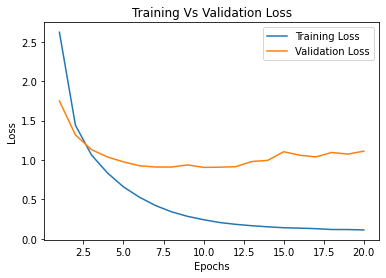

In [15]:
# Plotting the Training Vs Validation loss
loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training Loss')

plt.plot(epochs, val_loss, label='Validation Loss')

plt.title('Training Vs Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

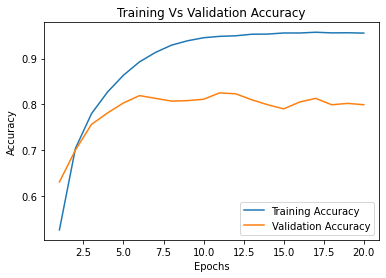

In [16]:
# Plotting the Training Vs Validation accuracy
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, label='Training Accuracy')

plt.plot(epochs, val_acc, label='Validation Accuracy')

plt.title('Training Vs Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

<h3>Observations : </h3>

The network begins to overfit after nine epochs, so training a new network from scratch for nine epochs and then evaluating it on test set.  

In [17]:
final_model = create_model()

final_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

final_model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 2.6672 - accuracy: 0.5381 - val_loss: 1.7694 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4399 - accuracy: 0.7070 - val_loss: 1.2997 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0482 - accuracy: 0.7771 - val_loss: 1.1275 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.8232 - accuracy: 0.8232 - val_loss: 1.0114 - val_accuracy: 0.7920
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6558 - accuracy: 0.8603 - val_loss: 0.9475 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5227 - accuracy: 0.8867 - val_loss: 0.9381 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4220 - accuracy: 0.9117 - val_loss: 0.8801 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [19]:
results = final_model.evaluate(x_test, one_hot_test_labels)

print('Loss is {0} and accuracy is {1}'.format(results[0], results[1]))

71/71 [==============================] - 0s 1ms/step - loss: 0.9594 - accuracy: 0.7898
Loss is 0.959370493888855 and accuracy is 0.7898486256599426


The above approach reaches nearly equals to ~80% 

In [20]:
# Predictions
predictions = final_model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [21]:
predictions[0].shape

(46,)

#### Wrapping up:

* In a single-label , multiclass classification problem , the network should end with softmax activation function so that it will output probability distribution over N output classes
* Categorical crossentropy minimizes the distance between probability distributions output by the network and the true distribution of the targets.
* If we need to classify data into large number of categories we should avoid creating information bottelnecks in our network due to intermediate layers that are too small.